<a href="https://colab.research.google.com/github/avi78/Tensorflow-Day-2/blob/main/akruti_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akrutisarangi","key":"b0e3dadd3641210e9deb66b6b12fbb81"}'}

In [3]:
!ls -lha kaggle.json

!pip install -q Kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 69 Feb 12 05:05 kaggle.json


In [4]:
!kaggle datasets download -d nilesh789/eurosat-rgb

 75% 67.0M/89.6M [00:00<00:00, 70.2MB/s]
100% 89.6M/89.6M [00:00<00:00, 99.2MB/s]


In [5]:
!unzip eurosat-rgb.zip

Streaming output truncated to the last 5000 lines.
  inflating: 2750/River/River_1449.jpg  
  inflating: 2750/River/River_145.jpg  
  inflating: 2750/River/River_1450.jpg  
  inflating: 2750/River/River_1451.jpg  
  inflating: 2750/River/River_1452.jpg  
  inflating: 2750/River/River_1453.jpg  
  inflating: 2750/River/River_1454.jpg  
  inflating: 2750/River/River_1455.jpg  
  inflating: 2750/River/River_1456.jpg  
  inflating: 2750/River/River_1457.jpg  
  inflating: 2750/River/River_1458.jpg  
  inflating: 2750/River/River_1459.jpg  
  inflating: 2750/River/River_146.jpg  
  inflating: 2750/River/River_1460.jpg  
  inflating: 2750/River/River_1461.jpg  
  inflating: 2750/River/River_1462.jpg  
  inflating: 2750/River/River_1463.jpg  
  inflating: 2750/River/River_1464.jpg  
  inflating: 2750/River/River_1465.jpg  
  inflating: 2750/River/River_1466.jpg  
  inflating: 2750/River/River_1467.jpg  
  inflating: 2750/River/River_1468.jpg  
  inflating: 2750/River/River_1469.jpg  
  inflat

In [6]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import random
import pandas as pd
from sklearn.model_selection import ShuffleSplit

In [7]:
ROOT_dir = "./2750/"
folders = os.listdir(ROOT_dir)

In [8]:
len_of_images = []
for i in folders:
    file_path = os.listdir("{}/{}".format(ROOT_dir,i))
    len_of_images.append(len(file_path))
    print(f"{i}:{len(file_path)} files")

Forest:3000 files
Industrial:2500 files
River:2500 files
Highway:2500 files
SeaLake:3000 files
PermanentCrop:2500 files
AnnualCrop:3000 files
HerbaceousVegetation:3000 files
Residential:3000 files
Pasture:2000 files


In [9]:
sum(len_of_images)

27000

In [10]:
file_path = os.listdir("{}/{}".format(ROOT_dir,"Highway"))

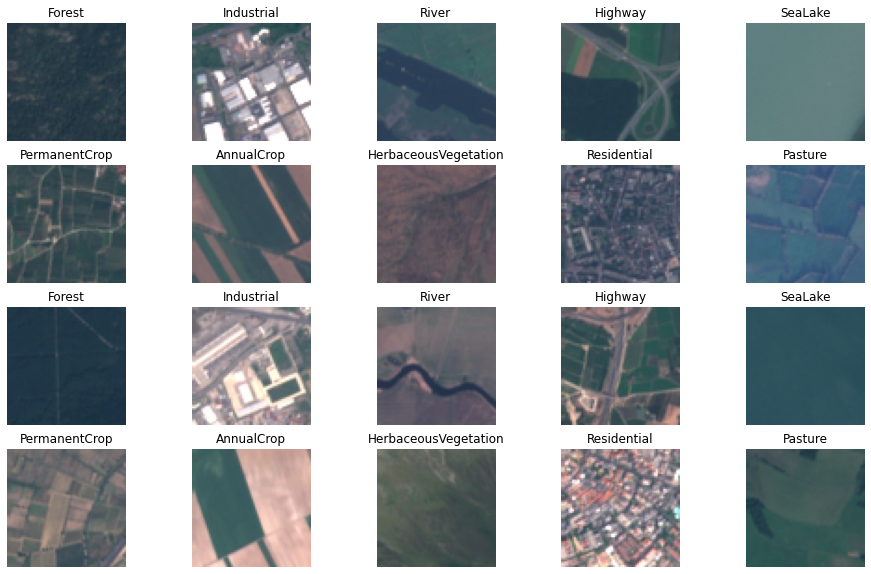

In [11]:
plt.figure(figsize=(16,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    file_path = os.listdir("{}/{}".format(ROOT_dir,folders[i%10]))
    image_ = Image.open(ROOT_dir+folders[i%10]+"/"+file_path[random.randint(1,1500)])
    plt.imshow(image_)
    plt.title(folders[i%10])
    plt.axis("off")

In [12]:
TRAIN_DIR = './training'
TEST_DIR = './testing'

for path in [TRAIN_DIR,TEST_DIR]:
    if not os.path.exists(path):
        os.mkdir(path)
        
for subfolder in folders:
    if not os.path.exists(os.path.join(TRAIN_DIR,subfolder)):
        os.mkdir(os.path.join(TRAIN_DIR,subfolder))

    if not os.path.exists(os.path.join(TEST_DIR, subfolder)):
        os.mkdir(os.path.join(TEST_DIR, subfolder))

In [13]:
dataset = {}
for value_class in folders:
    for img in os.listdir(ROOT_dir+'/'+value_class):
        dataset.update({os.path.join(ROOT_dir,value_class,img):value_class})

X = pd.Series(dataset.keys())
y = pd.get_dummies(dataset.values())
split = ShuffleSplit(n_splits=1,test_size=0.25,train_size=0.75,random_state=42)

In [14]:
import re
import shutil
from tqdm import tqdm

for train_idx, test_idx in split.split(X, y):
    train_paths = X[train_idx]
    test_paths = X[test_idx]

    # define a new path for each image depending on training or testing
    new_train_paths = [re.sub('./2750', './training', i) for i in train_paths]
    new_test_paths = [re.sub('./2750/', './testing/', i) for i in test_paths]

    train_path_map = list((zip(train_paths, new_train_paths)))
    test_path_map = list((zip(test_paths, new_test_paths)))
    
    # move the files
    print("moving training files..")
    for i in tqdm(train_path_map):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('training', 'testing', i[1])):
                shutil.copy(i[0], i[1])
    
    print("moving testing files..")
    for i in tqdm(test_path_map):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('training', 'testing', i[1])):
                shutil.copy(i[0], i[1])

moving training files..


100%|██████████| 20250/20250 [00:05<00:00, 3883.93it/s]


moving testing files..


100%|██████████| 6750/6750 [00:01<00:00, 4927.70it/s]


### Performing Data Augmentation

In [15]:
import tensorflow as tf
import os 
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_image_generate = ImageDataGenerator(rescale = 1/255.0,
                               rotation_range=45,
                               zoom_range=0.2 
)

In [17]:
test_image_generate = ImageDataGenerator(rescale = 1/255.0)

In [18]:
training_data = train_image_generate.flow_from_directory(TRAIN_DIR,
                                   batch_size=32,
                                   target_size=(64,64),
                                   class_mode='categorical')

Found 20250 images belonging to 10 classes.


In [19]:
testing_data = test_image_generate.flow_from_directory(TEST_DIR,
                                   batch_size=32,
                                   target_size=(64,64),
                                   class_mode='categorical')
     

Found 6750 images belonging to 10 classes.


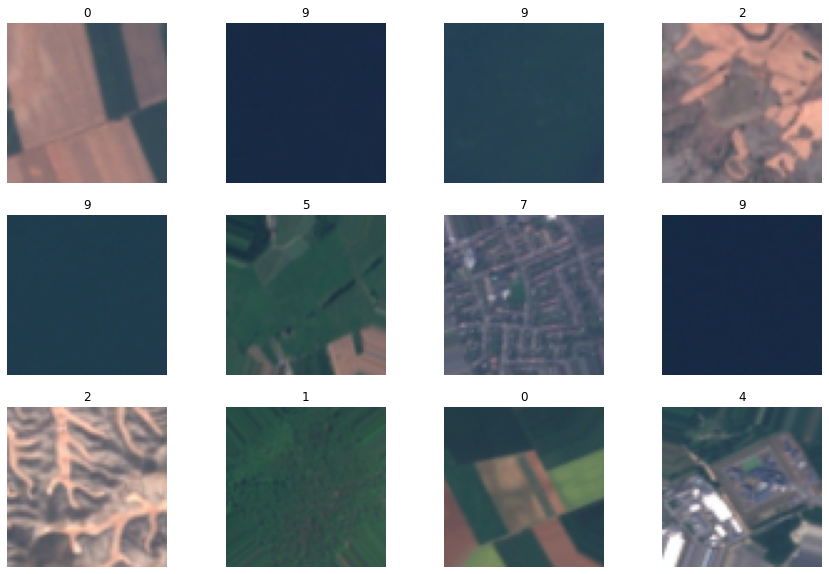

In [20]:
plt.figure(figsize=(15,10))
n = 12
for i in range(n):
    plt.subplot(3,4,i+1)
    validImages,validLabels = training_data[i]
    plt.imshow(validImages[0])
    decodeLabel = np.argmax(validLabels)
    plt.title(decodeLabel)
    plt.axis("off")

### Building CNN Model

In [21]:
model= keras.models.Sequential()
model.add(keras.layers.Conv2D(16,3,padding="same",input_shape=(64,64,3)))
model.add(keras.layers.Conv2D(32,3,padding="same",activation="relu"))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(64,3,padding="same",activation="relu"))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(64,3,padding="same",activation="relu"))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(128,3,padding="same",activation="relu"))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(128,3,padding="same",activation="relu"))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu",kernel_regularizer="l2"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,activation="softmax"))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        3

### Compile, fit and Predict

In [23]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['acc'])

In [24]:
history = model.fit_generator(training_data,epochs=20,validation_data=testing_data)

<ipython-input-24-d503d0c2ae97>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_data,epochs=20,validation_data=testing_data)


Epoch 1/20
633/633 [==============================] - 49s 59ms/step - loss: 1.6986 - acc: 0.4043 - val_loss: 1.3302 - val_acc: 0.5434
Epoch 2/20
633/633 [==============================] - 37s 59ms/step - loss: 1.0133 - acc: 0.6575 - val_loss: 0.8064 - val_acc: 0.7141
Epoch 3/20
633/633 [==============================] - 37s 58ms/step - loss: 0.8084 - acc: 0.7358 - val_loss: 0.6729 - val_acc: 0.7750
Epoch 4/20
633/633 [==============================] - 36s 57ms/step - loss: 0.7136 - acc: 0.7762 - val_loss: 0.7467 - val_acc: 0.7714
Epoch 5/20
633/633 [==============================] - 36s 57ms/step - loss: 0.6233 - acc: 0.8059 - val_loss: 0.5585 - val_acc: 0.8163
Epoch 6/20
633/633 [==============================] - 36s 57ms/step - loss: 0.5841 - acc: 0.8210 - val_loss: 0.4755 - val_acc: 0.8567
Epoch 7/20
633/633 [==============================] - 36s 58ms/step - loss: 0.5192 - acc: 0.8466 - val_loss: 0.4272 - val_acc: 0.8684
Epoch 8/20
633/633 [==============================] - 36s 58ms

In [25]:
import pandas as pd
ne=history.epoch
data= pd.DataFrame(history.history)
data

,loss,acc,val_loss,val_acc
0,1.698631,0.404346,1.330180,0.543407
1,1.013315,0.657531,0.806357,0.714074
2,0.808390,0.735753,0.672894,0.774963
3,0.713579,0.776247,0.746676,0.771407
4,0.623305,0.805926,0.558536,0.816296
5,0.584060,0.820988,0.475493,0.856741
6,0.519194,0.846568,0.427177,0.868444
7,0.491230,0.854173,0.406599,0.880889
8,0.454602,0.869679,0.430637,0.876148
9,0.415540,0.881630,0.451710,0.865481


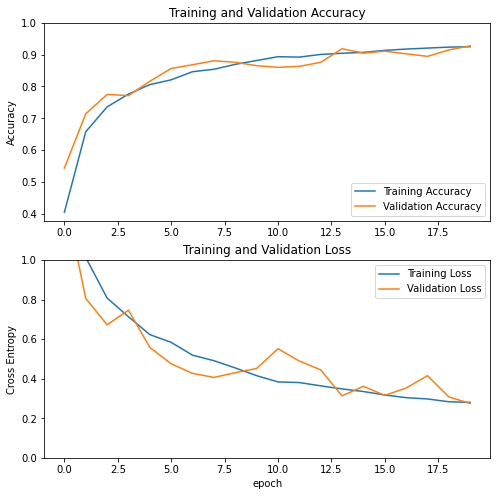

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()